In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# (0) Downloading dataset

In [2]:
stocks = ['NVDA', 'AAPL', 'MSFT', 'GOOG', 'AMZN', 'META', 'BRK-B', 'TSLA', 'AVGO', 'LLY']
data = yf.download(stocks, start="2023-08-01", end="2024-11-01")
data

[*********************100%***********************]  10 of 10 completed


Price                       Adj Close                                      \
Ticker                           AAPL        AMZN        AVGO       BRK-B   
Date                                                                        
2023-08-01 00:00:00+00:00  194.138092  131.690002   90.113113  352.260010   
2023-08-02 00:00:00+00:00  191.130890  128.210007   87.399933  351.190002   
2023-08-03 00:00:00+00:00  189.731522  128.910004   86.682938  353.809998   
2023-08-04 00:00:00+00:00  180.620605  139.570007   86.356773  349.989990   
2023-08-07 00:00:00+00:00  177.504211  142.220001   87.866173  362.579987   
...                               ...         ...         ...         ...   
2024-10-25 00:00:00+00:00  231.155685  187.830002  173.000000  454.010010   
2024-10-28 00:00:00+00:00  233.143494  188.389999  172.020004  458.489990   
2024-10-29 00:00:00+00:00  233.413193  190.830002  179.240005  454.619995   
2024-10-30 00:00:00+00:00  229.847122  192.729996  176.639999  454.959991   
2024-10-31 00:00:00+00:00  225.661728  186.399994  169.770004  450.920013   

Price                                                                      \
Ticker                           GOOG         LLY        META        MSFT   
Date                                                                        
2023-08-01 00:00:00+00:00  131.566895  448.360687  321.741272  332.463440   
2023-08-02 00:00:00+00:00  128.324844  449.736176  313.366486  323.725372   
2023-08-03 00:00:00+00:00  128.454544  444.471710  312.249847  322.895050   
2023-08-04 00:00:00+00:00  128.225098  444.798279  309.797241  324.002075   
2023-08-07 00:00:00+00:00  131.616776  449.340302  315.609741  326.305206   
...                               ...         ...         ...         ...   
2024-10-25 00:00:00+00:00  166.990005  891.223999  573.250000  427.294708   
2024-10-28 00:00:00+00:00  168.339996  894.109253  578.159973  425.737823   
2024-10-29 00:00:00+00:00  171.139999  902.085999  593.280029  431.087128   
2024-10-30 00:00:00+00:00  176.139999  845.429871  591.799988  431.665955   
2024-10-31 00:00:00+00:00  172.690002  828.368042  567.580017  405.538269   

Price                                              ...     Volume             \
Ticker                           NVDA        TSLA  ...       AAPL       AMZN   
Date                                               ...                         
2023-08-01 00:00:00+00:00   46.489101  261.070007  ...   35175100   42098500   
2023-08-02 00:00:00+00:00   44.251968  254.110001  ...   50389300   51027600   
2023-08-03 00:00:00+00:00   44.497871  259.320007  ...   61235200   88585200   
2023-08-04 00:00:00+00:00   44.662804  253.860001  ...  115799700  152938700   
2023-08-07 00:00:00+00:00   45.399529  251.449997  ...   97576100   71213100   
...                               ...         ...  ...        ...        ...   
2024-10-25 00:00:00+00:00  141.539993  269.190002  ...   38802300   29362100   
2024-10-28 00:00:00+00:00  140.520004  262.510010  ...   36087100   27930800   
2024-10-29 00:00:00+00:00  141.250000  259.519989  ...   35417200   35690200   
2024-10-30 00:00:00+00:00  139.339996  257.549988  ...   47070900   37707600   
2024-10-31 00:00:00+00:00  132.759995  249.850006  ...   64370100   75146800   

Price                                                                       \
Ticker                         AVGO    BRK-B      GOOG       LLY      META   
Date                                                                         
2023-08-01 00:00:00+00:00  19683000  2293300  22154300   1738200  22817900   
2023-08-02 00:00:00+00:00  26877000  3085900  22705800   2366600  20461100   
2023-08-03 00:00:00+00:00  18281000  2942000  15018100   2414100  15180200   
2023-08-04 00:00:00+00:00  21156000  2842000  20509500   1869800  17600200   
2023-08-07 00:00:00+00:00  11146000  5379900  17621000   2446400  16236500   
...                             ...      ...       ...       ...       ...   
2024-10-25 00:00:00

In [3]:
data.to_csv('dataset.csv')
adj_close = data['Adj Close']   # take the adjusted closing prices
price = np.array(adj_close[:'2024-07-31 00:00:00+00:00'])   # take data from 2023-08-01 to 2024-07-31
num_trading_days = price.shape[0]
num_trading_days

252

In [4]:
stocks = list(adj_close.keys())   # record the sequence of stock names in dataframe so that won't mess up later

# (1) Computing daily returns
The return matrix over the whole data set is calculated as follows:

In [5]:
price_all = np.array(adj_close)
ret = np.log(price_all[1:,:]/price_all[:-1,:])
with np.printoptions(precision=3):
    print(ret)

[[-0.016 -0.027 -0.031 ... -0.027 -0.049 -0.027]
 [-0.007  0.005 -0.008 ... -0.003  0.006  0.02 ]
 [-0.049  0.079 -0.004 ...  0.003  0.004 -0.021]
 ...
 [ 0.001  0.013  0.041 ...  0.012  0.005 -0.011]
 [-0.015  0.01  -0.015 ...  0.001 -0.014 -0.008]
 [-0.018 -0.033 -0.04  ... -0.062 -0.048 -0.03 ]]


# (2) Constructing correlation matrix
The correlation matrix from __1 August 2023 to 31 July 2024__ is computed as:

In [6]:
ret = np.log(price[1:,:]/price[:-1,:])
mean = np.mean(ret, axis=0)
sd = np.std(ret, axis=0)
std_ret = (ret - mean) / sd
corr = np.dot(std_ret.T, std_ret) / (num_trading_days - 1)
with np.printoptions(precision=3):
    print(corr)

[[ 1.     0.305  0.352  0.18   0.395  0.126  0.286  0.471  0.283  0.389]
 [ 0.305  1.     0.405  0.18   0.551  0.227  0.614  0.591  0.459  0.24 ]
 [ 0.352  0.405  1.     0.032  0.309  0.205  0.408  0.456  0.678  0.352]
 [ 0.18   0.18   0.032  1.     0.238  0.103  0.194  0.22  -0.003  0.096]
 [ 0.395  0.551  0.309  0.238  1.     0.158  0.444  0.53   0.366  0.2  ]
 [ 0.126  0.227  0.205  0.103  0.158  1.     0.217  0.216  0.285  0.079]
 [ 0.286  0.614  0.408  0.194  0.444  0.217  1.     0.594  0.459  0.201]
 [ 0.471  0.591  0.456  0.22   0.53   0.216  0.594  1.     0.455  0.269]
 [ 0.283  0.459  0.678 -0.003  0.366  0.285  0.459  0.455  1.     0.23 ]
 [ 0.389  0.24   0.352  0.096  0.2    0.079  0.201  0.269  0.23   1.   ]]


# (3) Computing eigenvalues and eigenvectors
Based on the correlation matrix we calculated in problem (2), we can compute its eigenvalues and eigenvectors. Note that columns in `evecs` corresponds to `evalues[i]`.

In [7]:
evalues, evecs = np.linalg.eig(corr)
with np.printoptions(precision=3):
    print('evalues: ', evalues) 
    print('evectors(in columns):', evecs)

evalues:  [4.045 1.165 1.058 0.897 0.683 0.621 0.522 0.292 0.362 0.354]
evectors(in columns): [[-0.297  0.135 -0.486 -0.104  0.415 -0.459 -0.334 -0.018  0.365 -0.137]
 [-0.383  0.097  0.221  0.221  0.073  0.344  0.116  0.022  0.18  -0.759]
 [-0.349 -0.424 -0.114 -0.033 -0.398 -0.254  0.041  0.665 -0.114 -0.076]
 [-0.136  0.697  0.003 -0.338 -0.591 -0.154  0.035 -0.059  0.026 -0.056]
 [-0.344  0.271  0.071  0.212  0.315 -0.164  0.698  0.136 -0.012  0.354]
 [-0.181 -0.126  0.402 -0.816  0.326  0.095  0.012  0.083 -0.027  0.026]
 [-0.37   0.073  0.256  0.205 -0.101  0.337 -0.447  0.127  0.397  0.503]
 [-0.4    0.126  0.039  0.141  0.129 -0.037 -0.351 -0.165 -0.796  0.019]
 [-0.354 -0.435  0.125 -0.006 -0.28  -0.262  0.158 -0.687  0.155  0.053]
 [-0.227 -0.082 -0.673 -0.228 -0.066  0.603  0.192 -0.118 -0.069  0.118]]


# (4) Sorting in descending orders
Sort the eigenvalues and their corresponding eigenvectos in descending orders.

In [8]:
order = np.argsort(evalues)[::-1]
order  # indice of sorted array 

array([0, 1, 2, 3, 4, 5, 6, 8, 9, 7], dtype=int64)

In [9]:
sorted_evalues = evalues[order]
# sorted_evecs = evecs[:, order]  
sorted_evecs = evecs.T    # take the columns as eigenvectors
sorted_evecs = sorted_evecs[order]

with np.printoptions(precision=3):
    for i in range(len(order)):
        print('evalue: ', sorted_evalues[i]) 
        print('evector:', sorted_evecs[i])

evalue:  4.044756309502782
evector: [-0.297 -0.383 -0.349 -0.136 -0.344 -0.181 -0.37  -0.4   -0.354 -0.227]
evalue:  1.164886792905422
evector: [ 0.135  0.097 -0.424  0.697  0.271 -0.126  0.073  0.126 -0.435 -0.082]
evalue:  1.05816220017093
evector: [-0.486  0.221 -0.114  0.003  0.071  0.402  0.256  0.039  0.125 -0.673]
evalue:  0.8974911898294431
evector: [-0.104  0.221 -0.033 -0.338  0.212 -0.816  0.205  0.141 -0.006 -0.228]
evalue:  0.6832211554023128
evector: [ 0.415  0.073 -0.398 -0.591  0.315  0.326 -0.101  0.129 -0.28  -0.066]
evalue:  0.6209574992200554
evector: [-0.459  0.344 -0.254 -0.154 -0.164  0.095  0.337 -0.037 -0.262  0.603]
evalue:  0.5223640206144402
evector: [-0.334  0.116  0.041  0.035  0.698  0.012 -0.447 -0.351  0.158  0.192]
evalue:  0.36244218325400807
evector: [ 0.365  0.18  -0.114  0.026 -0.012 -0.027  0.397 -0.796  0.155 -0.069]
evalue:  0.3536308497073018
evector: [-0.137 -0.759 -0.076 -0.056  0.354  0.026  0.503  0.019  0.053  0.118]
evalue:  0.29208779939

# (5) Plotting eigenvalues versus eigenmode numbers

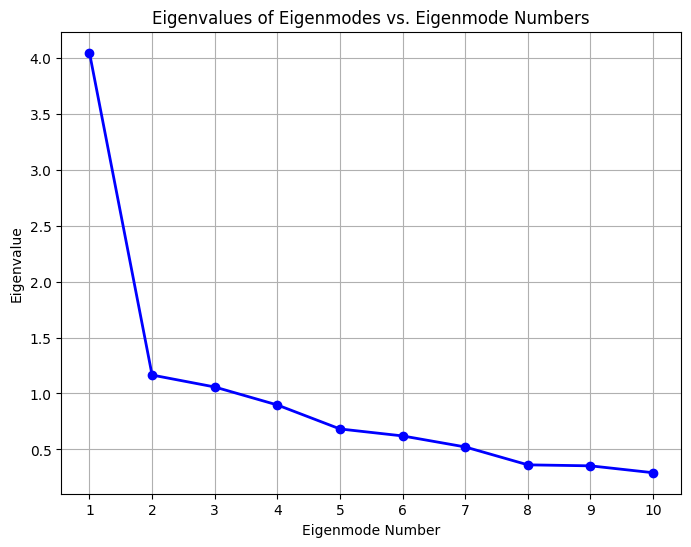

In [10]:
eigenmode_numbers = np.arange(1, len(sorted_evalues) + 1)

plt.figure(figsize=(8, 6))
plt.plot(eigenmode_numbers, sorted_evalues, marker='o', color='b', linestyle='-', linewidth=2)

plt.title('Eigenvalues of Eigenmodes vs. Eigenmode Numbers')
plt.xlabel('Eigenmode Number')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.xticks(eigenmode_numbers)  
plt.show()

# (6) Computing cumulative variance
This part computes the cumulative variance and take 80% as cut-off value to decide the numner of principal components we would look at later on.

In [11]:
p = len(sorted_evalues)
evalue_ratio = sorted_evalues / p
cumulative_variance = np.cumsum(evalue_ratio)
num_portfolios_80_percent = np.argmax(cumulative_variance >= 0.8)
num_portfolios_80_percent

5

# (7) Cluster visualization

In [12]:
pc2 = sorted_evecs[1]
pc3 = sorted_evecs[2]    # take eigenvectors by columns

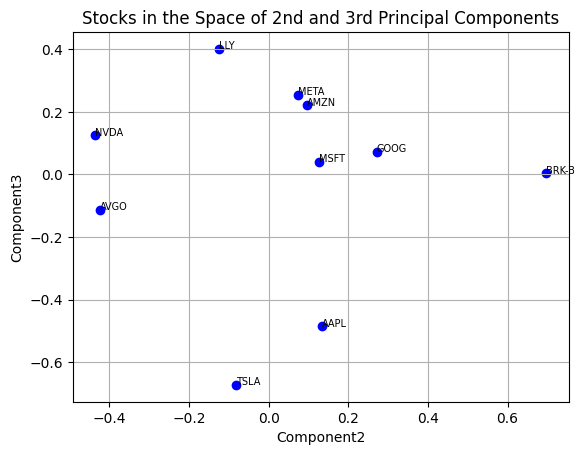

In [13]:
plt.figure()

for i, stock in enumerate(stocks):
    plt.scatter(pc2[i], pc3[i], label=stock, marker='o', color='b')
    plt.annotate(stock, (pc2[i], pc3[i]), fontsize=7)

plt.xlabel('Component2')
plt.ylabel('Component3')
plt.title('Stocks in the Space of 2nd and 3rd Principal Components')
plt.grid(True)
plt.show()

We can observe from the plot that Meta(META), Amazon(AMZN), Microsoft(MSFT), and Google(GOOG) together form a cluster, which implictates they exhibit similar behavior in stock market, since they're similar companies either at the view of principal component 2 and 3. 

Apart from that, if we only look at component 2, we can see that Meta(META), Amazon(AMZN), Microsoft(MSFT), Google(GOOG), Eli Lilly(ILY), Tesla(TSLA), and Apple(AAPL) are close to each other, while Nvidia(NVDA) and Broadcom Inc.(AVGO) form a cluster, and Berkshire Hathaway Inc. Class B(BRK-B) is isolated. This is probably caused by the industries these companies are involved. The largest cluster may involve companies that develop softwares, the smaller one may have something to do with hardware development, while the isolated Berkshire Hathaway Inc. Class B does not involve a lot in IT.

Similarly, if we only look at component 3, we can find that Meta(META), Amazon(AMZN), Microsoft(MSFT), Google(GOOG), Eli Lilly(ILY), Nvidia(NVDA), Broadcom Inc.(AVGO), and Berkshire Hathaway Inc. Class B(BRK-B) form a cluster; while Tesla(TSLA) and Apple(AAPL) form another. This characteristic implies similarities in another aspect.

# (A) Stock investment with equal weight
## (8) 
The volume of stocks invested and the value of the portfolio adopting equal weight strategy are computed as follows.

In [14]:
def equal_weight(price, days, n=10):
    weights = np.ones(n) * (1 / n)
    volume = weights / price[0]
    vol = np.tile(volume, (days, 1))
    value = vol * price
    value = value.sum(axis=1)
#     value = np.dot(volume.T, (price[end] - price[0]))
    return volume, value
    
eqw_volume, eqw_value = equal_weight(price, days=num_trading_days)
print('Volumes distributed per unit capital: ')
for i, vol in enumerate(eqw_volume):
    print(stocks[i] + ': ' + str(vol), end='\t')

Volumes distributed per unit capital: 
AAPL: 0.0005150972637501402	AMZN: 0.0007593590868410357	AVGO: 0.0011097164022335888	BRK-B: 0.000283881216225863	GOOG: 0.0007600696235651274	LLY: 0.00022303471923918808	META: 0.0003108087420270368	MSFT: 0.00030078495252778507	NVDA: 0.0021510417918871334	TSLA: 0.00038303902093131506	

# (B) Risk Parity
## (9)
The volume of stocks invested and the value of the portfolio adopting risk parity strategy are computed as follows.

In [15]:
def risk_parity(price, sd, days, n=10):
    sd_inverse = np.ones(n) / sd
    weights = sd_inverse / np.sum(sd_inverse)
    volume = weights / price[0]
    vol = np.tile(volume, (days, 1))
    value = vol * price
    value = value.sum(axis=1)
#     value = np.dot(volume.T, (price[end] - price[0]))
    return volume, value
    
rp_volume, rp_value = risk_parity(price, sd, num_trading_days)
print('Volumes distributed per unit capital: ')
for i, vol in enumerate(rp_volume):
    print(stocks[i] + ': ' + str(vol), end='\t')

Volumes distributed per unit capital: 
AAPL: 0.0006113425140714641	AMZN: 0.0007396096175081623	AVGO: 0.0007302295550183676	BRK-B: 0.0006093684930406213	GOOG: 0.0007449362210014042	LLY: 0.0001970507581799657	META: 0.00023324562062861453	MSFT: 0.0004089434614987542	NVDA: 0.0011979327405784131	TSLA: 0.00019306492173614884	

# (C) Equal Weight Portfolio
## (10) Projections on principal components
From previous, $N$ is selected to be 5.

In [16]:
def equal_weight_projection(evectors, N, n=10):
    weights = np.ones(n) * (1 / n)
    projections = np.dot(evectors, weights)
    return projections
    
projections = equal_weight_projection(sorted_evecs[:num_portfolios_80_percent], num_portfolios_80_percent)
print('Projection on the first N=5 principal components:\n', projections)

Projection on the first N=5 principal components:
 [-0.30406885  0.03328366 -0.01559737 -0.0747044  -0.01767103]


## (11) Sign-corrected eigenvectors
According to the result obtained in (10), the sign-corrected eigenvector are calculated. In `corrected_evecs`, each row represents a sign-corrected eigenvector.

In [17]:
def sign_corrected_evecs(evectors, proj, N, n=10):
    signs = np.array([[1] if i >= 0 else [-1] for i in proj])
    corrected = signs * evectors
    weights = np.sum(corrected, axis=0) / N
    
    return corrected, weights
    
corrected_evecs, weights_contributed = sign_corrected_evecs(sorted_evecs[:num_portfolios_80_percent], projections, num_portfolios_80_percent)
with np.printoptions(precision=3):
    print('Sign-corrected eigenvectors(displayed in rows):\n', np.round(corrected_evecs, 3))
    print('Weights:\n', weights_contributed)

Sign-corrected eigenvectors(displayed in rows):
 [[ 0.297  0.383  0.349  0.136  0.344  0.181  0.37   0.4    0.354  0.227]
 [ 0.135  0.097 -0.424  0.697  0.271 -0.126  0.073  0.126 -0.435 -0.082]
 [ 0.486 -0.221  0.114 -0.003 -0.071 -0.402 -0.256 -0.039 -0.125  0.673]
 [ 0.104 -0.221  0.033  0.338 -0.212  0.816 -0.205 -0.141  0.006  0.228]
 [-0.415 -0.073  0.398  0.591 -0.315 -0.326  0.101 -0.129  0.28   0.066]]
Weights:
 [ 0.121 -0.007  0.094  0.352  0.003  0.029  0.017  0.043  0.016  0.222]


## (12) Short positions and value of portfolio
Based on the weights calculated from (11), the volume distributed per unit capital following the 1/N strategy can be calculated as follows. In addition, the second stock has negative values, indicating that Apple has the short position in this strategy.

In [18]:
def equal_weight_portfolio(price, weights, days, n=10):
    normalized_weights = weights / np.sum(weights)
    volume = normalized_weights / price[0]
    vol = np.tile(volume, (days, 1))
    value = vol * price
    value = value.sum(axis=1)
#     value = np.dot(volume.T, (price[end] - price[0]))
    return volume, value
    
ewp_volume, ewp_value = equal_weight_portfolio(price, weights_contributed, num_trading_days)
print('Volumes distributed per unit capital: ')
for i, vol in enumerate(ewp_volume):
    print(stocks[i] + ': ' + str(vol), end='\t')
print('\n')

mask = weights_contributed < 0
short = np.array(stocks)[mask]
print('Stock(s) in short position in this strategy: ', short)

Volumes distributed per unit capital: 
AAPL: 0.0007024252507662246	AMZN: -5.8103346158567816e-05	AVGO: 0.0011710945478627594	BRK-B: 0.001121165054978401	GOOG: 2.9093175268096204e-05	LLY: 7.171538911515352e-05	META: 5.820706577300898e-05	MSFT: 0.00014622526993584068	NVDA: 0.0003860846691219362	TSLA: 0.0009558301411936226	

Stock(s) in short position in this strategy:  ['AMZN']


Result suggests that Amazon has the shortest position.

# (D) Diversified risk parity
## (13)
The volume of stocks invested and the value of the portfolio adopting diversified risk parity strategy are computed as follows.

In [19]:
def diversified_risk_parity(price, evectors, evalues, N, days, n=10):
    risk_weights = np.ones(N) / np.sqrt(evalues)
    sum_risk_weights = np.sum(risk_weights)
    stock_weights = np.dot(risk_weights, evectors) / sum_risk_weights   # normalize
    stock_weights = stock_weights / np.sum(stock_weights)
    volume = stock_weights / price[0]
    vol = np.tile(volume, (days, 1))
    value = vol * price
    value = value.sum(axis=1)
#     val = np.dot(volume.T, (price[end] - price[0]))
    return volume, value
    
drp_volume, drp_value = diversified_risk_parity(price, corrected_evecs, sorted_evalues[:num_portfolios_80_percent], num_portfolios_80_percent, num_trading_days)
print('Volumes distributed per unit capital: ')
for i, vol in enumerate(drp_volume):
    print(stocks[i] + ': ' + str(vol), end='\t')
print('\n')

mask = drp_volume < 0
short = np.array(stocks)[mask]
print('Stock(s) in short position in diversified risk parity strategy: ', short)

Volumes distributed per unit capital: 
AAPL: 0.0006114752089251751	AMZN: -0.0006515596217118655	AVGO: 0.00152227317138163	BRK-B: 0.0017007243874182692	GOOG: -0.0006437492469879559	LLY: 3.727435754402344e-05	META: -9.503009949372266e-05	MSFT: -2.815561524612798e-05	NVDA: -2.5947967335729087e-05	TSLA: 0.0013021225425720792	

Stock(s) in short position in diversified risk parity strategy:  ['AMZN' 'GOOG' 'META' 'MSFT' 'NVDA']


## (14) Plotting daily portfolios
This part visualies daily portfolio from __1 August 2023 to 31 July 2024__(252 trading days in total).

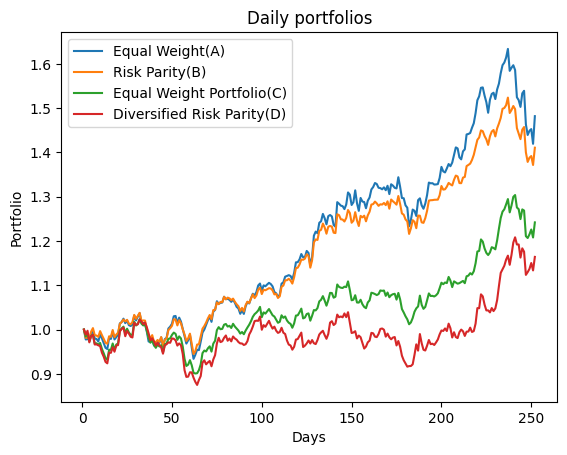

In [20]:
def plot_portfolios(eqw_p, rp_p, ewp_p, drp_p, n_days):
    portfolios = [eqw_p, rp_p, ewp_p, drp_p]
    fig = plt.figure()
    xs = [i + 1 for i in range(n_days)]
    strategies = ['Equal Weight(A)', 'Risk Parity(B)', 'Equal Weight Portfolio(C)', 'Diversified Risk Parity(D)']
    for idx, s in enumerate(strategies):
        plt.plot(xs, portfolios[idx], label=s)
    
    plt.legend()
    plt.xlabel('Days')
    plt.ylabel('Portfolio')
    plt.title('Daily portfolios')
    plt.show()
        
    return portfolios

daily_portfolios = plot_portfolios(eqw_value, rp_value, ewp_value, drp_value, num_trading_days)

# (15) Evaluating strategies
First use `np.column_stack()` to organize values obtained from the previous 4 strategies into a matrix, so that we can compare them conveniently.

In [21]:
values = np.column_stack((eqw_value, rp_value, ewp_value, drp_value))

## Gain

In [22]:
def compute_gain(value):
    return value[-1,:] / value[0,:]

gain = compute_gain(values)
print('Gains(A, B, C, D):\n', gain)

Gains(A, B, C, D):
 [1.4819752  1.41077889 1.24204669 1.1641281 ]


## Standard deviation

In [23]:
def compute_std(value):
    return np.std(value, axis=0)

std = compute_std(values)
print('Standard deviation(A, B, C, D):\n', std)

Standard deviation(A, B, C, D):
 [0.190291   0.16024243 0.08635513 0.05961731]


## Minimum value

In [24]:
def compute_minimum_value(value):
    return np.min(value, axis=0)  / value[0,:]

min_val = compute_minimum_value(values)
print('Minimum value(A, B, C, D):\n', min_val)

Minimum value(A, B, C, D):
 [0.93383549 0.94477155 0.90079188 0.87496907]


# (16) Computing Beta

In [25]:
m_data = yf.download('^GSPC', start="2023-08-01", end="2024-11-01")
gspc_price = np.array(m_data['Close'][:'2024-07-31 00:00:00+00:00'])
market_ret = np.log(gspc_price[1:] / gspc_price[:-1])
# with np.printoptions(precision=3):
#     print(market_ret)

[*********************100%***********************]  1 of 1 completed


In [26]:
portfolio_ret = np.log(values[1:,:] / values[:-1,:])

In [27]:
def compute_beta(market_ret, portfolio_ret, num_strategies=4):
    p = portfolio_ret.T
    cov = np.zeros(num_strategies)
    for i in range(num_strategies):
        cov[i] = np.cov(market_ret.T, p[i,:], ddof=0)[0][1]
    var = np.var(market_ret, ddof=0)
    return cov / var

beta = compute_beta(market_ret, np.column_stack((portfolio_ret, market_ret)), 5)
beta /= beta[-1]   # normalize beta since arithmetic operations may cause beta(GSPC) not equal to 1
print('Beta(A, B, C, D, market):\n', beta)

Beta(A, B, C, D, market):
 [1.52926386 1.29910084 1.25335572 1.10477216 1.        ]


The equal weight strategy has the highest covariance with the market return, indicating a strong relationship with the market; while the diversified risk parity strategy displays the weakest relationship, hence it has the lowest portfolio value.

In conclusion, the values of metrics evaluating the 4 strategies are shown as follows:

| Strategy | Gain | Standard deviation | Minimum Value |  Beta |
|:----------|:------------:|:----------:|:----------   |:----------|
| Equal Weight | 1.482 | 0.190  |0.934 |1.529|
| Risk Parity  |  1.411      | 0.160  |0.945 |1.299 |
| Equal Weight Portfolio  | 1.242  | 0.086 | 0.901 |1.253 |
| Diversified Risk Parity | 1.164  | 0.060 | 0.875 |1.105 |

# 17 Backtest
Test the 4 strategies on trading data __from 1 August 2024 to 31 October 2024__, which is 65 trading days in length.

In [28]:
test_data = adj_close['2024-08-01 00:00:00+00:00':]
test_data

Ticker,AAPL,AMZN,AVGO,BRK-B,GOOG,LLY,META,MSFT,NVDA,TSLA
Date,,,,,,,,,,
2024-08-01 00:00:00+00:00,217.867844,184.070007,146.538040,431.809998,172.223282,829.903992,497.265594,415.527802,109.200661,216.860001
2024-08-02 00:00:00+00:00,219.364456,167.899994,143.348526,428.359985,168.178604,802.009216,487.674774,406.940491,107.260818,207.669998
2024-08-05 00:00:00+00:00,208.798340,161.020004,141.614227,413.720001,160.428818,772.898193,475.276611,393.651093,100.441406,198.880005
2024-08-06 00:00:00+00:00,206.762924,161.929993,143.448196,422.140015,160.328934,790.763611,493.619080,398.094177,104.241081,200.639999
2024-08-07 00:00:00+00:00,209.347107,162.770004,135.823273,427.019989,160.538666,769.787720,488.454041,396.918671,98.901543,191.759995
...,...,...,...,...,...,...,...,...,...,...
2024-10-25 00:00:00+00:00,231.155685,187.830002,173.000000,454.010010,166.990005,891.223999,573.250000,427.294708,141.539993,269.190002
2024-10-28 00:00:00+00:00,233.143494,188.389999,172.020004,458.489990,168.339996,894.109253,578.159973,425.737823,140.520004,262.510010
2024-10-29 00:00:00+00:00,233.413193,190.830002,179.240005,454.619995,171.139999,902.085999,593.280029,431.087128,141.250000,259.519989


Convert our test dataset to numpy arrays and record the number of trading days in this dataset.

In [29]:
test_price = np.array(test_data)
test_gspc_price = np.array(m_data['Close']['2024-08-01 00:00:00+00:00':])
test_market_ret = np.log(test_gspc_price[1:] / test_gspc_price[:-1])

test_num_trading_days = test_price.shape[0]
test_num_trading_days

65

We start again by computing return matrix for this portion of data, then construct the correlation matrix and compute its eigenvalues and eigenvectors.

In [30]:
test_ret = np.log(test_price[1:,:]/test_price[:-1,:])
test_mean = np.mean(test_ret, axis=0)
test_sd = np.std(test_ret, axis=0)
test_std_ret = (test_ret - test_mean) / test_sd
test_corr = np.dot(test_std_ret.T, test_std_ret) / (test_num_trading_days - 1)

test_evalues, test_evecs = np.linalg.eig(test_corr)
test_order = np.argsort(test_evalues)[::-1]
sorted_test_evalues = test_evalues[test_order] 
sorted_test_evecs = test_evecs.T    # take the columns as eigenvectors
sorted_test_evecs = sorted_test_evecs[test_order]

with np.printoptions(precision=3):
    for i in range(len(order)):
        print('evalue: ', sorted_test_evalues[i]) 
        print('evector:', sorted_test_evecs[i])

evalue:  5.061642494866527
evector: [0.291 0.354 0.364 0.176 0.326 0.249 0.37  0.375 0.339 0.257]
evalue:  1.0987136477899726
evector: [-0.189  0.079  0.204 -0.704  0.048 -0.404 -0.023 -0.025  0.168  0.475]
evalue:  0.9831495947013822
evector: [-0.212 -0.171  0.323 -0.362 -0.355  0.601  0.067 -0.063  0.324 -0.299]
evalue:  0.6714689885831289
evector: [ 0.731 -0.356  0.022 -0.194  0.084 -0.196 -0.275  0.037  0.337 -0.254]
evalue:  0.5748353303328322
evector: [-0.213  0.135 -0.061 -0.305  0.531 -0.151  0.242  0.185 -0.107 -0.657]
evalue:  0.45698206234435684
evector: [-0.414 -0.251  0.247  0.41   0.337 -0.211 -0.171 -0.294  0.511 -0.038]
evalue:  0.3890037953373878
evector: [ 0.135 -0.453 -0.14  -0.137  0.417  0.298  0.409 -0.451 -0.19   0.262]
evalue:  0.3353774549516186
evector: [-0.149 -0.564 -0.07   0.11  -0.263 -0.276  0.474  0.516  0.066  0.047]
evalue:  0.2389784048891104
evector: [-0.189 -0.052 -0.649 -0.11   0.226  0.332 -0.318  0.35   0.322  0.197]
evalue:  0.18984822620368735


Then compute the cumulative variance to decide the value of $N$ using the 80% cut-off.

In [31]:
test_evalue_ratio = sorted_test_evalues / len(sorted_test_evalues)
test_cumulative_variance = np.cumsum(test_evalue_ratio)
test_num_portfolios_80_percent = np.argmax(test_cumulative_variance >= 0.8)
test_num_portfolios_80_percent

4

Volume distributed for 10 stocks across the 4 different strategies are as follows:

In [32]:
# (A) Equal weight
test_eqw_volume, test_eqw_value = equal_weight(test_price, days=test_num_trading_days)
print('Volumes distributed per unit capital in equal weight strategy: ')
for i, vol in enumerate(test_eqw_volume):
    print(stocks[i] + ': ' + str(vol), end='\t')
print('\n')
print('*******************************************************************************************************')

# (B) Risk Parity
test_rp_volume, test_rp_value = risk_parity(test_price, test_sd, test_num_trading_days)
print('Volumes distributed per unit capital in risk parity strategy: ')
for i, vol in enumerate(test_rp_volume):
    print(stocks[i] + ': ' + str(vol), end='\t')
print('\n')
print('*******************************************************************************************************')

# (C) Equal weight portfolio
test_projections = equal_weight_projection(sorted_test_evecs[:test_num_portfolios_80_percent], test_num_portfolios_80_percent)
corrected_test_evecs, test_weights_contributed = sign_corrected_evecs(sorted_evecs[:test_num_portfolios_80_percent], 
                                                                      test_projections, test_num_portfolios_80_percent)
with np.printoptions(precision=3):
    print('Sign-corrected eigenvectors(displayed in rows):\n', np.round(corrected_test_evecs, 3))
print('\n')    

test_ewp_volume, test_ewp_value = equal_weight_portfolio(test_price, test_weights_contributed, test_num_trading_days)
print('Volumes distributed per unit capital in equal weight portfolio strategy: ')
for i, vol in enumerate(test_ewp_volume):
    print(stocks[i] + ': ' + str(vol), end='\t')
print('\n')
test_mask = test_weights_contributed < 0
test_short = np.array(stocks)[test_mask]
print('Stock(s) in short position in this strategy: ', test_short)
print('*******************************************************************************************************')

# (D) Diversified risk parity
test_drp_volume, test_drp_value = diversified_risk_parity(test_price, corrected_test_evecs, 
                                                          sorted_test_evalues[:test_num_portfolios_80_percent], 
                                                          test_num_portfolios_80_percent, test_num_trading_days)
print('Volumes distributed per unit capital in diversified risk parity strategy: ')
for i, vol in enumerate(test_drp_volume):
    print(stocks[i] + ': ' + str(vol), end='\t')
print('\n')
test_mask = test_drp_volume < 0
test_short = np.array(stocks)[test_mask]
print('Stock(s) in short position in this strategy: ', test_short)

Volumes distributed per unit capital in equal weight strategy: 
AAPL: 0.00045899384844868613	AMZN: 0.0005432715598465815	AVGO: 0.0006824166604796972	BRK-B: 0.00023158333657254118	GOOG: 0.0005806415887550307	LLY: 0.00012049586578713903	META: 0.00020109977667786337	MSFT: 0.00024065778423422714	NVDA: 0.000915745375109279	TSLA: 0.0004611269930764107	

*******************************************************************************************************
Volumes distributed per unit capital in risk parity strategy: 
AAPL: 0.0005905591357266871	AMZN: 0.0004815871359061722	AVGO: 0.00039867589113977794	BRK-B: 0.0004188603882314057	GOOG: 0.0006905136066769681	LLY: 0.00010047510669975412	META: 0.0002226990755274357	MSFT: 0.00031957954135271196	NVDA: 0.0004914269538981472	TSLA: 0.0002024116376877101	

*******************************************************************************************************
Sign-corrected eigenvectors(displayed in rows):
 [[-0.297 -0.383 -0.349 -0.136 -0.344 -0.181 -

Visualize the results:

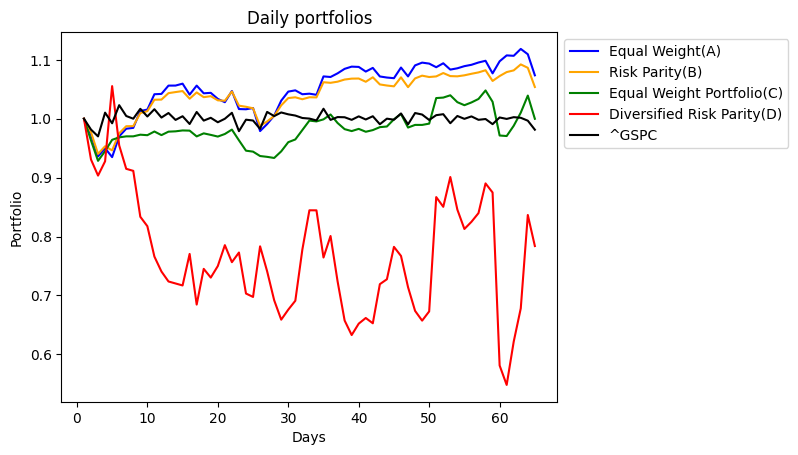

In [33]:
test_market_portfolios = np.ones((test_num_trading_days,1))
test_market_portfolios[1:] = test_gspc_price[1:] / test_gspc_price[:-1]

def plot_portfolios_gspc(eqw_p, rp_p, ewp_p, drp_p, gspc, n_days):
    portfolios = [eqw_p, rp_p, ewp_p, drp_p, gspc]
    fig = plt.figure()
    xs = [i + 1 for i in range(n_days)]
    strategies = ['Equal Weight(A)', 'Risk Parity(B)', 'Equal Weight Portfolio(C)', 'Diversified Risk Parity(D)', '^GSPC']
    colors = ['blue', 'orange', 'green', 'red', 'black']
    for idx, s in enumerate(strategies):
        plt.plot(xs, portfolios[idx], color=colors[idx], label=s)
    
    plt.legend(loc='upper left',  bbox_to_anchor=(1, 1))
    plt.xlabel('Days')
    plt.ylabel('Portfolio')
    plt.title('Daily portfolios')
    plt.show()
        
    return portfolios

_ = plot_portfolios_gspc(test_eqw_value, test_rp_value, test_ewp_value, test_drp_value, test_market_portfolios, test_num_trading_days)

Based on observations from __1 August 2023 to 31 July 2024__, an investor is likely to adopt strategy A or B to reduce risks. In the investment period from __1 August 2024 to 31 October 2024__, back test proves that the ability of strategies to reduce risks remain almost the same as previous period, where equal weight and risk parity still do better than equal weight portfolio and diversified risk parity strategy.

In [34]:
test_values = np.column_stack((test_eqw_value, test_rp_value, test_ewp_value, test_drp_value, test_market_portfolios))
test_gain = compute_gain(test_values)
test_std = compute_std(test_values)
test_min_val = compute_minimum_value(test_values)

test_portfolio_ret = np.log(test_values[1:,:] / test_values[:-1,:])
test_beta = compute_beta(test_market_ret, np.column_stack((test_portfolio_ret, test_market_ret)), 5)
test_beta /= test_beta[-1]

with np.printoptions(precision=3):
    print('Data corresponds to strategy A, B, C, D and market from left to right:')
    print('Gain:\n', test_gain)
    print('Standard deviation:\n', test_std)
    print('Minimum value:\n', test_min_val)
    print('Beta:\n', test_beta)

Data corresponds to strategy A, B, C, D and market from left to right:
Gain:
 [1.074 1.054 1.    0.784 0.981]
Standard deviation:
 [0.044 0.035 0.028 0.101 0.009]
Minimum value:
 [0.935 0.94  0.929 0.548 0.97 ]
Beta:
 [ 1.441  1.198  0.71  -2.091  1.   ]


In conclusion, the values of metrics evaluating the 4 strategies are shown as follows. Statistics show that A and B's behavior is more stable and do better at reducing risks than D is.

| Strategy                |  Gain | Standard deviation | Minimum Value|  Beta |
|:----------              |:-----:|:------------------:|:------------:|:-----:|
| Equal Weight            | 1.074 | 0.044              | 0.935        | 1.441 |
| Risk Parity             | 1.054 | 0.035              | 0.940        | 1.198 |
| Equal Weight Portfolio  | 1.242 | 0.028              | 0.929        | 0.710 |
| Diversified Risk Parity | 1.164 | 0.101              | 0.548        | -2.091|
| ^GSPC                   | 0.981 | 0.009              | 0.970        | 1.000 |